# Computer Vision

In [1]:
import torchvision
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## CV module

In [29]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html#intro

# load image
# http://freewallpaper2010.blogspot.com/2011/12/messi-kick-ball-wallpaper.html
FILENAME = 'messi.jpg'
"""
cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
"""

img = cv2.imread(FILENAME, cv2.IMREAD_COLOR)
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(1000, 1600, 3)
uint8
0
255


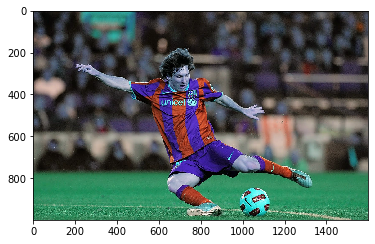

In [51]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) # matplotlib uses RGB, cv2 uses BGR

## Color Spaces

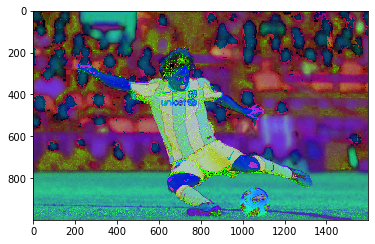

In [123]:
# http://colorizer.org/
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
#plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR))

## Math + Logic  

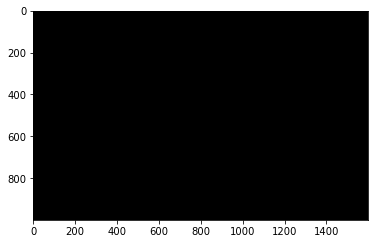

In [86]:
# Operations
plt.imshow(img_rgb*2)
#plt.imshow(img_rgb - img_rgb)

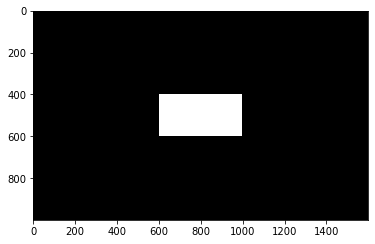

In [109]:
# Bitwise-AND mask and original image
mask = np.zeros((img_rgb.shape[0], img_rgb.shape[1]), dtype=np.uint8)
mask[400:600,600:1000] = 1
plt.imshow(mask, cmap='gray')

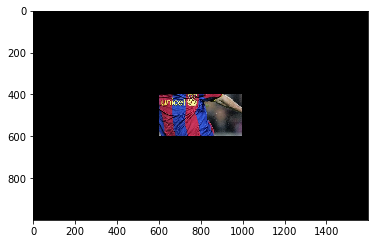

In [112]:
masked_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(masked_img)

## Smoothing images

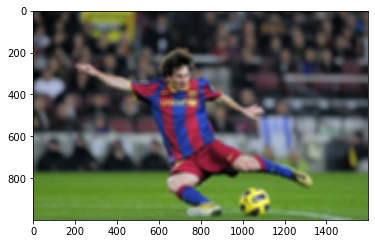

In [133]:
# averaging
plt.imshow( cv2.blur(img_rgb,(21,21)) )

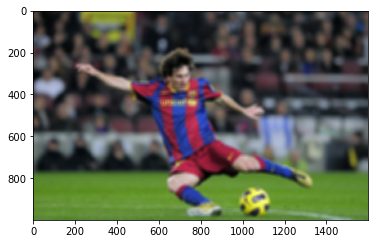

In [137]:
# gaussian filter
plt.imshow( cv2.GaussianBlur(img_rgb,(21,21),10)) # std in both directions

## Canny edge detection

(1000, 1600)


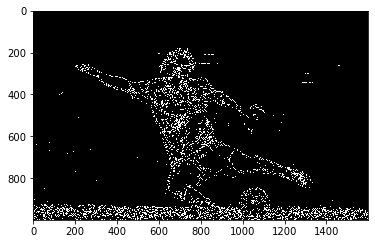

In [122]:
edges = cv2.Canny(img_rgb,100,200) # min and max gradient threshold, keep edges in between
print(edges.shape)
plt.imshow(edges, cmap='gray')

## TorchVision package

In [2]:
train_mnist = MNIST('.data', download=False, train=True)
train_cifar = CIFAR10('.data', download=False, train=True)

In [33]:
train_mnist[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F40095F3110>, 5)

In [34]:
print(train_mnist[0][0].mode) # grayscale
train_mnist[0][0].size

L


(28, 28)

In [3]:
totensor = transforms.ToTensor()
topil = transforms.ToPILImage()

torch.Size([1, 28, 28])


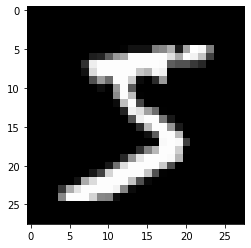

In [4]:
img = totensor(train_mnist[0][0])
print(img.size())
plt.imshow(img.squeeze(0), cmap='gray') 

In [37]:
topil(img)

In [38]:
print(train_cifar[0][0].mode)
train_cifar[0][0].size

RGB


(32, 32)

torch.Size([3, 32, 32])


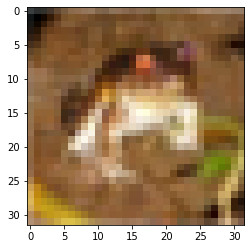

In [5]:
img_cifar = totensor(train_cifar[0][0])
print(img_cifar.size())
#plt.imshow(img_cifar) # error!!!
plt.imshow(img_cifar.permute(1,2,0))

In [6]:
crop = transforms.CenterCrop(15) # not working on grayscale!

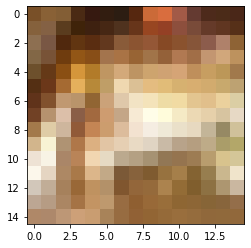

In [7]:
plt.imshow(totensor(crop(topil(img_cifar))).permute(1,2,0))

In [14]:
rotate = transforms.RandomRotation(30) # not working on grayscale!

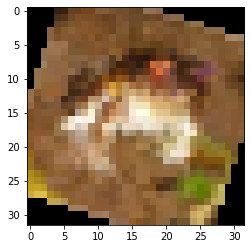

In [15]:
plt.imshow(totensor(rotate(topil(img_cifar))).permute(1,2,0))